# Results

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import MaxNLocator

In [9]:
df = pd.read_csv('/home/matteo/uniTN/hpc/results_new/result-summary.csv', index_col=False)
del df['id']
df['combine_processing_dist_agg_time'] = df['average_time_per_hour'] - df['average_saving_time_per_hour']
df['processing_time'] = df['average_time_per_hour'] - df['average_saving_time_per_hour'] - df['average_aggregation_distribution_time_per_hour']
df_grouped = df.groupby(['number_of_processes', 'process_per_node'], as_index=False).mean()

In [10]:
df

,number_of_processes,process_per_node,hardware_clock_tick,io_time,permutation_time,distribution_operations_time,average_time_per_hour,average_saving_time_per_hour,average_aggregation_distribution_time_per_hour,combine_processing_dist_agg_time,processing_time
0,1,1,1.000000e-09,22.267701,0.145670,0.193372,13.963251,3.947666,0.000209,10.015585,10.015376
1,16,1,1.000000e-09,16.240425,0.103601,1.111476,3.277177,2.410636,0.243931,0.866541,0.622610
2,4,1,1.000000e-09,16.069815,0.060903,0.411813,4.321566,2.438763,0.135364,1.882803,1.747439
3,8,1,1.000000e-09,16.159700,0.101610,0.734912,4.693308,2.360235,1.350893,2.333073,0.982180
4,2,1,1.000000e-09,15.176918,0.093564,0.206741,5.388593,2.316519,0.074277,3.072074,2.997797
...,...,...,...,...,...,...,...,...,...,...,...
89,8,1,1.000000e-09,20.336651,0.270001,0.818273,6.052675,2.898954,1.392751,3.153721,1.760970
90,2,1,1.000000e-09,16.223162,0.106082,0.232940,6.230780,2.431946,0.108758,3.798834,3.690076
91,2,1,1.000000e-09,16.560483,0.114812,0.241020,5.969152,2.391062,0.175136,3.578090,3.402954
92,2,1,1.000000e-09,14.794777,0.086002,0.209528,5.294482,2.207356,0.073594,3.087126,3.013532


In [11]:
df_grouped

,number_of_processes,process_per_node,hardware_clock_tick,io_time,permutation_time,distribution_operations_time,average_time_per_hour,average_saving_time_per_hour,average_aggregation_distribution_time_per_hour,combine_processing_dist_agg_time,processing_time
0,1,1,1.000000e-09,26.024568,0.171244,0.208985,11.200700,3.184950,0.000131,8.015751,8.015619
1,2,1,1.000000e-09,15.949052,0.100242,0.220481,5.765693,2.351374,0.116664,3.414319,3.297656
2,2,2,1.000000e-09,15.515029,0.097217,0.214953,5.603578,2.305844,0.089143,3.297734,3.208590
3,4,1,1.000000e-09,15.953984,0.107037,0.423865,4.191661,2.402791,0.146855,1.788870,1.642015
4,4,4,1.000000e-09,15.889723,0.087648,0.381342,4.052685,2.414296,0.111259,1.638389,1.527131
5,8,1,1.000000e-09,16.694834,0.108475,0.666249,4.263214,2.461758,0.789082,1.801456,1.012374
6,8,8,1.000000e-09,15.910250,0.068016,0.571734,3.301820,2.333491,0.137768,0.968329,0.830561
7,16,1,1.000000e-09,16.321910,0.099762,1.118543,3.314449,2.406005,0.295776,0.908443,0.612668
8,16,16,1.000000e-09,16.763657,0.140297,1.158154,3.607377,2.518942,0.282797,1.088435,0.805638


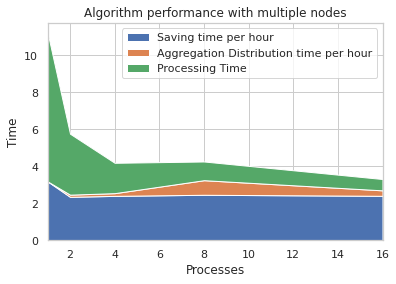

In [18]:
sns.set_theme(style="whitegrid")

df_grouped_only_multiple_nodes = df_grouped[np.logical_or(df_grouped["number_of_processes"] != df_grouped["process_per_node"], df_grouped["number_of_processes"] == 1)]
fig, ax = plt.subplots()
ax.stackplot(df_grouped_only_multiple_nodes["number_of_processes"], [df_grouped_only_multiple_nodes["average_saving_time_per_hour"], df_grouped_only_multiple_nodes["average_aggregation_distribution_time_per_hour"], df_grouped_only_multiple_nodes["processing_time"]],
             labels=["Saving time per hour", "Aggregation Distribution time per hour", "Processing Time"])
ax.legend(loc='upper right')
ax.set_title('Algorithm performance with multiple nodes')
ax.set_xlabel('Processes')
ax.set_ylabel('Time')

ax.set_xlim([1,16])

plt.show()

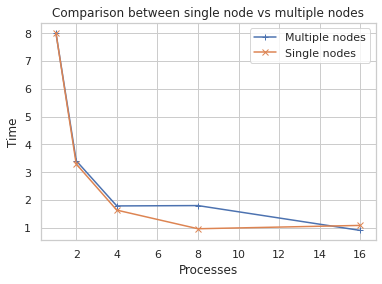

In [23]:
df_grouped_only_multiple_nodes = df_grouped[np.logical_or(df_grouped["number_of_processes"] != df_grouped["process_per_node"], df_grouped["number_of_processes"] == 1)]
df_grouped_only_single_nodes = df_grouped[np.logical_or(df_grouped["number_of_processes"] == df_grouped["process_per_node"], df_grouped["number_of_processes"] == 1)]

fig, ax = plt.subplots()
ax.plot(df_grouped_only_multiple_nodes["number_of_processes"], df_grouped_only_multiple_nodes["combine_processing_dist_agg_time"], marker="+", label="Multiple nodes")
ax.plot(df_grouped_only_single_nodes["number_of_processes"], df_grouped_only_single_nodes["combine_processing_dist_agg_time"], marker="x", label="Single nodes")

ax.legend(loc='upper right')
ax.set_title('Comparison between single node vs multiple nodes')
ax.set_xlabel('Processes')
ax.set_ylabel('Time')

plt.show()

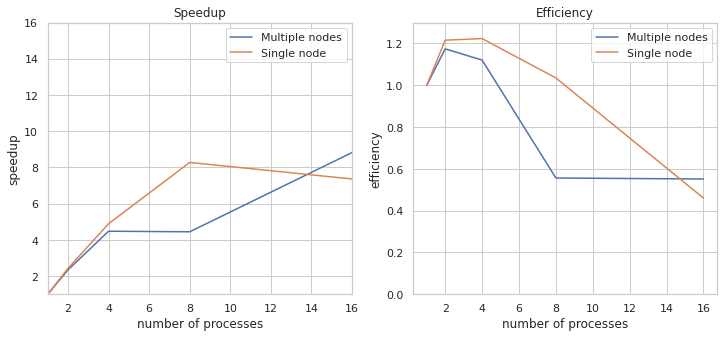

In [40]:
multiple_nodes_df = df_grouped[np.logical_or(df_grouped["number_of_processes"] != df_grouped["process_per_node"], df_grouped["number_of_processes"] == 1)]
single_node_df = df_grouped[np.logical_or(df_grouped["number_of_processes"] == df_grouped["process_per_node"], df_grouped["number_of_processes"] == 1)]

single_process_processing_time = multiple_nodes_df[multiple_nodes_df["number_of_processes"] == 1].iloc[0]['combine_processing_dist_agg_time']

data = []

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))  

x_multiple = multiple_nodes_df["number_of_processes"]
y_multiple = single_process_processing_time / (multiple_nodes_df['combine_processing_dist_agg_time'])
ax1.plot(x_multiple, y_multiple, label="Multiple nodes")

x_single = single_node_df["number_of_processes"]
y_single = single_process_processing_time / (single_node_df['combine_processing_dist_agg_time'])
ax1.plot(x_single, y_single, label="Single node")

ax1.set_title('Speedup')

ax1.set_xlabel('number of processes')
ax1.set_ylabel('speedup')
ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.set_xlim([1,16])
ax1.set_ylim([1,16])
ax1.legend()

# plot efficiency
y_multiple = y_multiple/x_multiple
ax2.plot(x_multiple, y_multiple, label="Multiple nodes")

y_single = y_single/x_single
ax2.plot(x_single, y_single, label="Single node")

ax2.set_title('Efficiency')

ax2.set_ylim(0, 1.3)
ax2.set_xlabel('number of processes')
ax2.set_ylabel('efficiency')
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.legend()

plt.show()

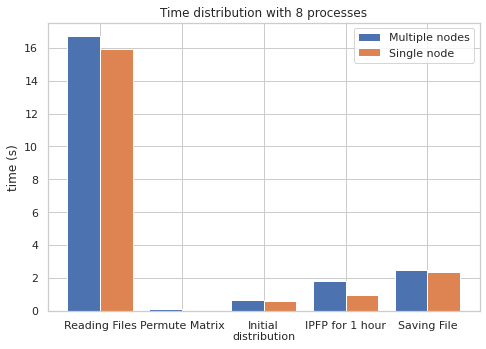

In [54]:
multiple_process_row = df_grouped[np.logical_and(df_grouped["number_of_processes"] == 8, df_grouped["process_per_node"] == 1)].iloc[0]
single_process_row = df_grouped[np.logical_and(df_grouped["number_of_processes"] == 8, df_grouped["process_per_node"] == 8)].iloc[0]

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bar_labels = ['Reading Files', 'Permute Matrix', 'Initial\ndistribution', 'IPFP for 1 hour', 'Saving File']
bar_height_multiple = [multiple_process_row['io_time'],multiple_process_row['permutation_time'],multiple_process_row['distribution_operations_time'],multiple_process_row['combine_processing_dist_agg_time'],multiple_process_row['average_saving_time_per_hour']]
bar_height_single = [single_process_row['io_time'],single_process_row['permutation_time'],single_process_row['distribution_operations_time'],single_process_row['combine_processing_dist_agg_time'],single_process_row['average_saving_time_per_hour']]

x = np.arange(len(bar_labels))
bar_width = 0.4

ax.bar(x, bar_height_multiple, width=bar_width, label="Multiple nodes")
ax.bar(x + bar_width, bar_height_single, width=bar_width, label="Single node")

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(bar_labels)
ax.set_ylabel('time (s)')

ax.legend()

ax.set_title('Time distribution with 8 processes')

plt.show()